![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# Carga de datos

Carguen la base de datos preparada desde la fase 2.

In [221]:
Hospital = pd.read_csv(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\Hospitales-ML\HospitalModelado.csv')
HospitalOk = Hospital.copy()

In [222]:
# Elimino los registros con valores nulos, y me quedo con 560 registros
HospitalOk.dropna(inplace=True)

# Preparación de Datos

Aquí se balancearán los valores, para obtener un dataset con misma cantidad de valores objetivos 1 y 0

In [223]:
# Se separa el dataset según hospitalización SI/NO
registros_hospitalizacion_1 = HospitalOk[HospitalOk['HOSPITALIZACION'] == 1]
registros_hospitalizacion_0 = HospitalOk[HospitalOk['HOSPITALIZACION'] == 0]

# Se obtiene la cantidad de veces que hay que multiplicar los registros en 1 para aproximarse a los registros en 0
nro = int(len(registros_hospitalizacion_0)/len(registros_hospitalizacion_1))

# Se crea un DF de n repeticiones del df con hospitalización en 1
registros_hospitalizacion_1_multi = pd.concat([registros_hospitalizacion_1] * nro, ignore_index=True)

# Los n registros multiplicados se agregan al DF HospitalOk
HospitalOk = pd.concat([HospitalOk, registros_hospitalizacion_1_multi], ignore_index=True)

In [224]:
HospitalOk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDAD                        1089 non-null   int64  
 1   DIABETES                    1089 non-null   int64  
 2   HOSPITALIZACION ULTIMO MES  1089 non-null   int64  
 3   PSA                         1089 non-null   float64
 4   BIOPSIAS PREVIAS            1089 non-null   float64
 5   VOLUMEN PROSTATICO          1089 non-null   float64
 6   MUESTRAS TOMADAS            1089 non-null   int64  
 7   CUP                         1089 non-null   float64
 8   EPOC                        1089 non-null   float64
 9   BIOPSIA                     1089 non-null   int64  
 10  COMPLICACION POST BIOPSIA   1089 non-null   int64  
 11  FIEBRE                      1089 non-null   int64  
 12  ITU                         1089 non-null   int64  
 13  TIPO DE CULTIVO             1089 

Separen el dataset en X, y (variable objetivo)

In [225]:
# Desetimamos datos referidos a complicaciones infecciosas
X = HospitalOk.drop(columns=[
'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'])
y = HospitalOk['HOSPITALIZACION']

In [226]:
X

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,MUESTRAS TOMADAS,CUP,EPOC,BIOPSIA
0,53,0,0,4.0,0.0,1.0,12,0.0,0.0,0
1,56,0,0,7.7,0.0,1.0,12,0.0,0.0,0
2,57,0,0,29.0,1.0,1.0,24,0.0,0.0,0
3,56,0,0,7.0,0.0,1.0,12,0.0,0.0,0
4,55,0,0,29.0,1.0,1.0,24,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1084,62,1,0,7.0,0.0,1.0,12,0.0,0.0,0
1085,64,1,0,5.7,0.0,1.0,24,0.0,0.0,0
1086,71,0,0,4.3,0.0,1.0,12,0.0,0.0,1
1087,69,1,0,14.0,0.0,1.0,18,0.0,0.0,1


Separen el dataset en X_train, X_test, y_train y y_test

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos Predictivos

# Árbol de Decisión

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [228]:
profundidad_maxima = 13
modelo_arbol = DecisionTreeClassifier(max_depth=profundidad_maxima)

In [229]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13)

In [230]:
y_train_pred = modelo_arbol.predict(X_train)
y_test_pred = modelo_arbol.predict(X_test)
y_total_pred = modelo_arbol.predict(X)

In [231]:
# Medimos exactitud del modelo en conjunto de entrenamiento, prueba y total
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_total = accuracy_score(y, y_total_pred)

print(f"Exactitud en conjunto de entrenamiento: {accuracy_train}")
print(f"Exactitud en conjunto de prueba: {accuracy_test}")
print(f"Exactitud en conjunto total: {accuracy_total}")

Exactitud en conjunto de entrenamiento: 0.9988518943742825
Exactitud en conjunto de prueba: 0.9862385321100917
Exactitud en conjunto total: 0.9963269054178145


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [232]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_total = confusion_matrix(y, y_total_pred)


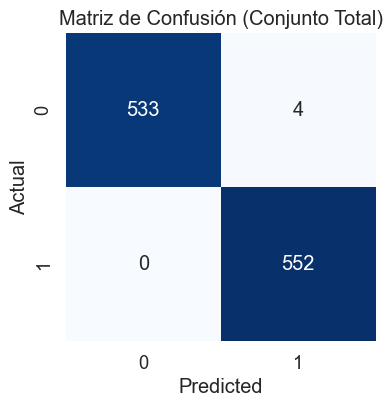

In [233]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_total, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión (Conjunto Total)')
plt.show()


In [234]:
verdaderos_positivos = confusion_matrix_total[1, 1]
falsos_positivos = confusion_matrix_total[0, 1]
verdaderos_negativos = confusion_matrix_total[0, 0]
falsos_negativos = confusion_matrix_total[1, 0]
total_predicciones = confusion_matrix_total.sum()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [235]:
# Exactitud (Accuracy): La exactitud es una métrica sencilla que mide la proporción de predicciones
# correctas en relación con el total de predicciones.
# Es útil cuando las clases están balanceadas (puede ser engañosa si las están desbalanceadas ya que
# un alto valor de exactitud puede ocultar problemas de clasificación en la clase minoritaria).
print('Exactitud:', accuracy_score(y, y_total_pred))
#print('Exactitud:', (verdaderos_positivos + verdaderos_negativos) / total_predicciones )

#Precisión: La precisión se refiere a la proporción de verdaderos positivos predichos sobre 
# todas los instancias que el modelo predijo como positivas. Es útil cuando el costo de los falsos positivos
# es alto, es decir, queremos minimizar los casos en los que clasificamos algo como positivo y no lo es.
print('Precisión:', precision_score(y, y_total_pred))
# print(f'Precisión: {verdaderos_positivos/(verdaderos_positivos + falsos_positivos)}')
print(f'El {int(precision_score(y, y_total_pred)*100)}% de las preedicciones positivas fueron correctas')

#Recuperación (Recall o Sensibilidad): La recuperación mide la proporción de instancias positivas correctamente
# identificadas entre todas las instancias reales que son positivas. Es útil cuando el costo de los falsos negativos
# es alto, es decir, queremos minimizar los casos en los que clasificamos incorrectamente algo como negativo.
print('Sensibilidad/Recuperación/Recall:', recall_score(y, y_total_pred))
# print(f'Sensibilidad: {verdaderos_positivos / (verdaderos_positivos + falsos_negativos)}')
print(f'El {recall_score(y, y_total_pred)*100}% de los casos positivos fueron detectados')

Exactitud: 0.9963269054178145
Precisión: 0.9928057553956835
El 99% de las preedicciones positivas fueron correctas
Sensibilidad/Recuperación/Recall: 1.0
El 100.0% de los casos positivos fueron detectados


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [236]:
# Obtenemos la importancia de las variables
importances = modelo_arbol.feature_importances_
# Obtenemos los nombres de las variables
nombres_variables = X.columns
# Ordenamos las variables por su importancia
indices = np.argsort(importances)[::-1]

modelo_arbol.feature_importances_

array([0.21976476, 0.        , 0.00732228, 0.36715414, 0.03049421,
       0.00991782, 0.27954566, 0.        , 0.007213  , 0.07858813])

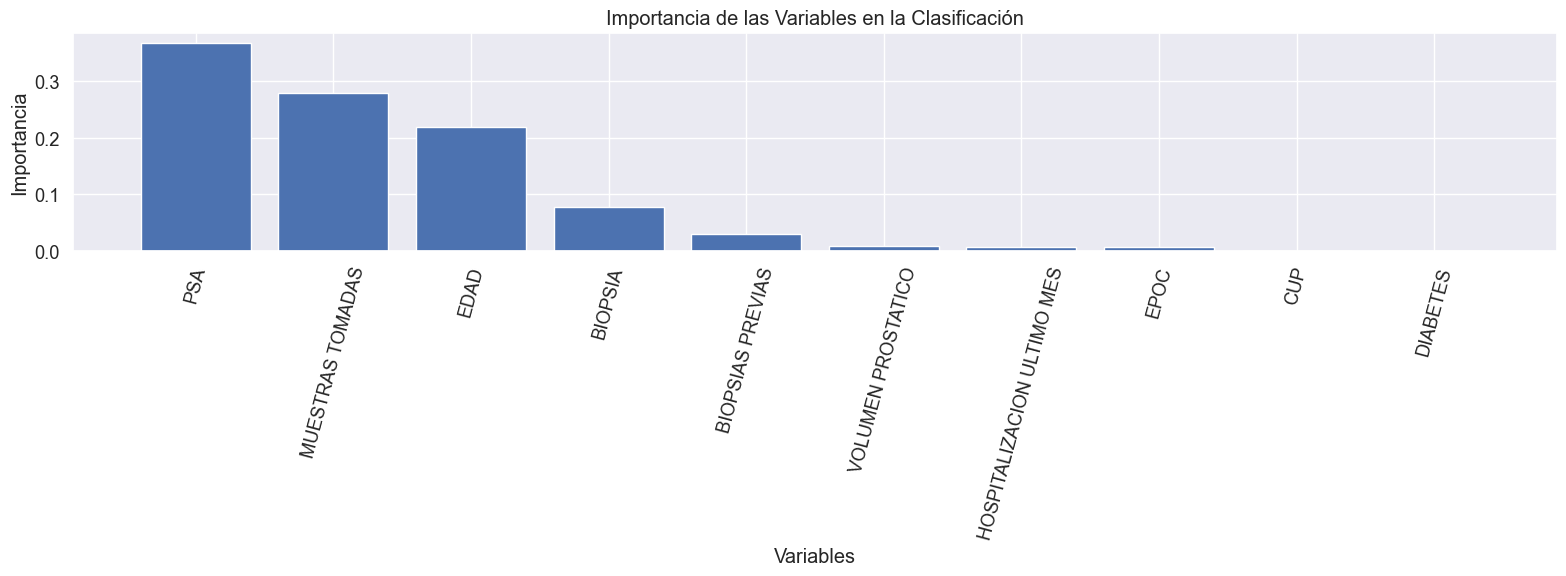

In [240]:
plt.figure(figsize=(16, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [nombres_variables[i] for i in indices], rotation=75)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.tight_layout()
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [238]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40]
Mejor_Exactitud = 0
Mejor_max_depth = None

for max_depth in max_depth_values:
    # Instanciamos el modelo de árbol de decisión con max_depth de la lista
    modelo_mejor_arbol = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Entrenamos el modelo
    modelo_mejor_arbol.fit(X_train, y_train)
    # Evaluamos el modelo en el conjunto total
    y_total_pred = modelo_mejor_arbol.predict(X)
    Exactitud = accuracy_score(y, y_total_pred)
    # Verificamos si el rendimiento es mejor que el anterior
    if Exactitud > Mejor_Exactitud:
        Mejor_Exactitud = Exactitud
        Mejor_max_depth = max_depth

print("Mejor max_depth:", Mejor_max_depth, 'Exactitud:', Mejor_Exactitud)

Mejor max_depth: 13 Exactitud: 0.9963269054178145


Seguimos analizando el comportamiento del árbol de decisión

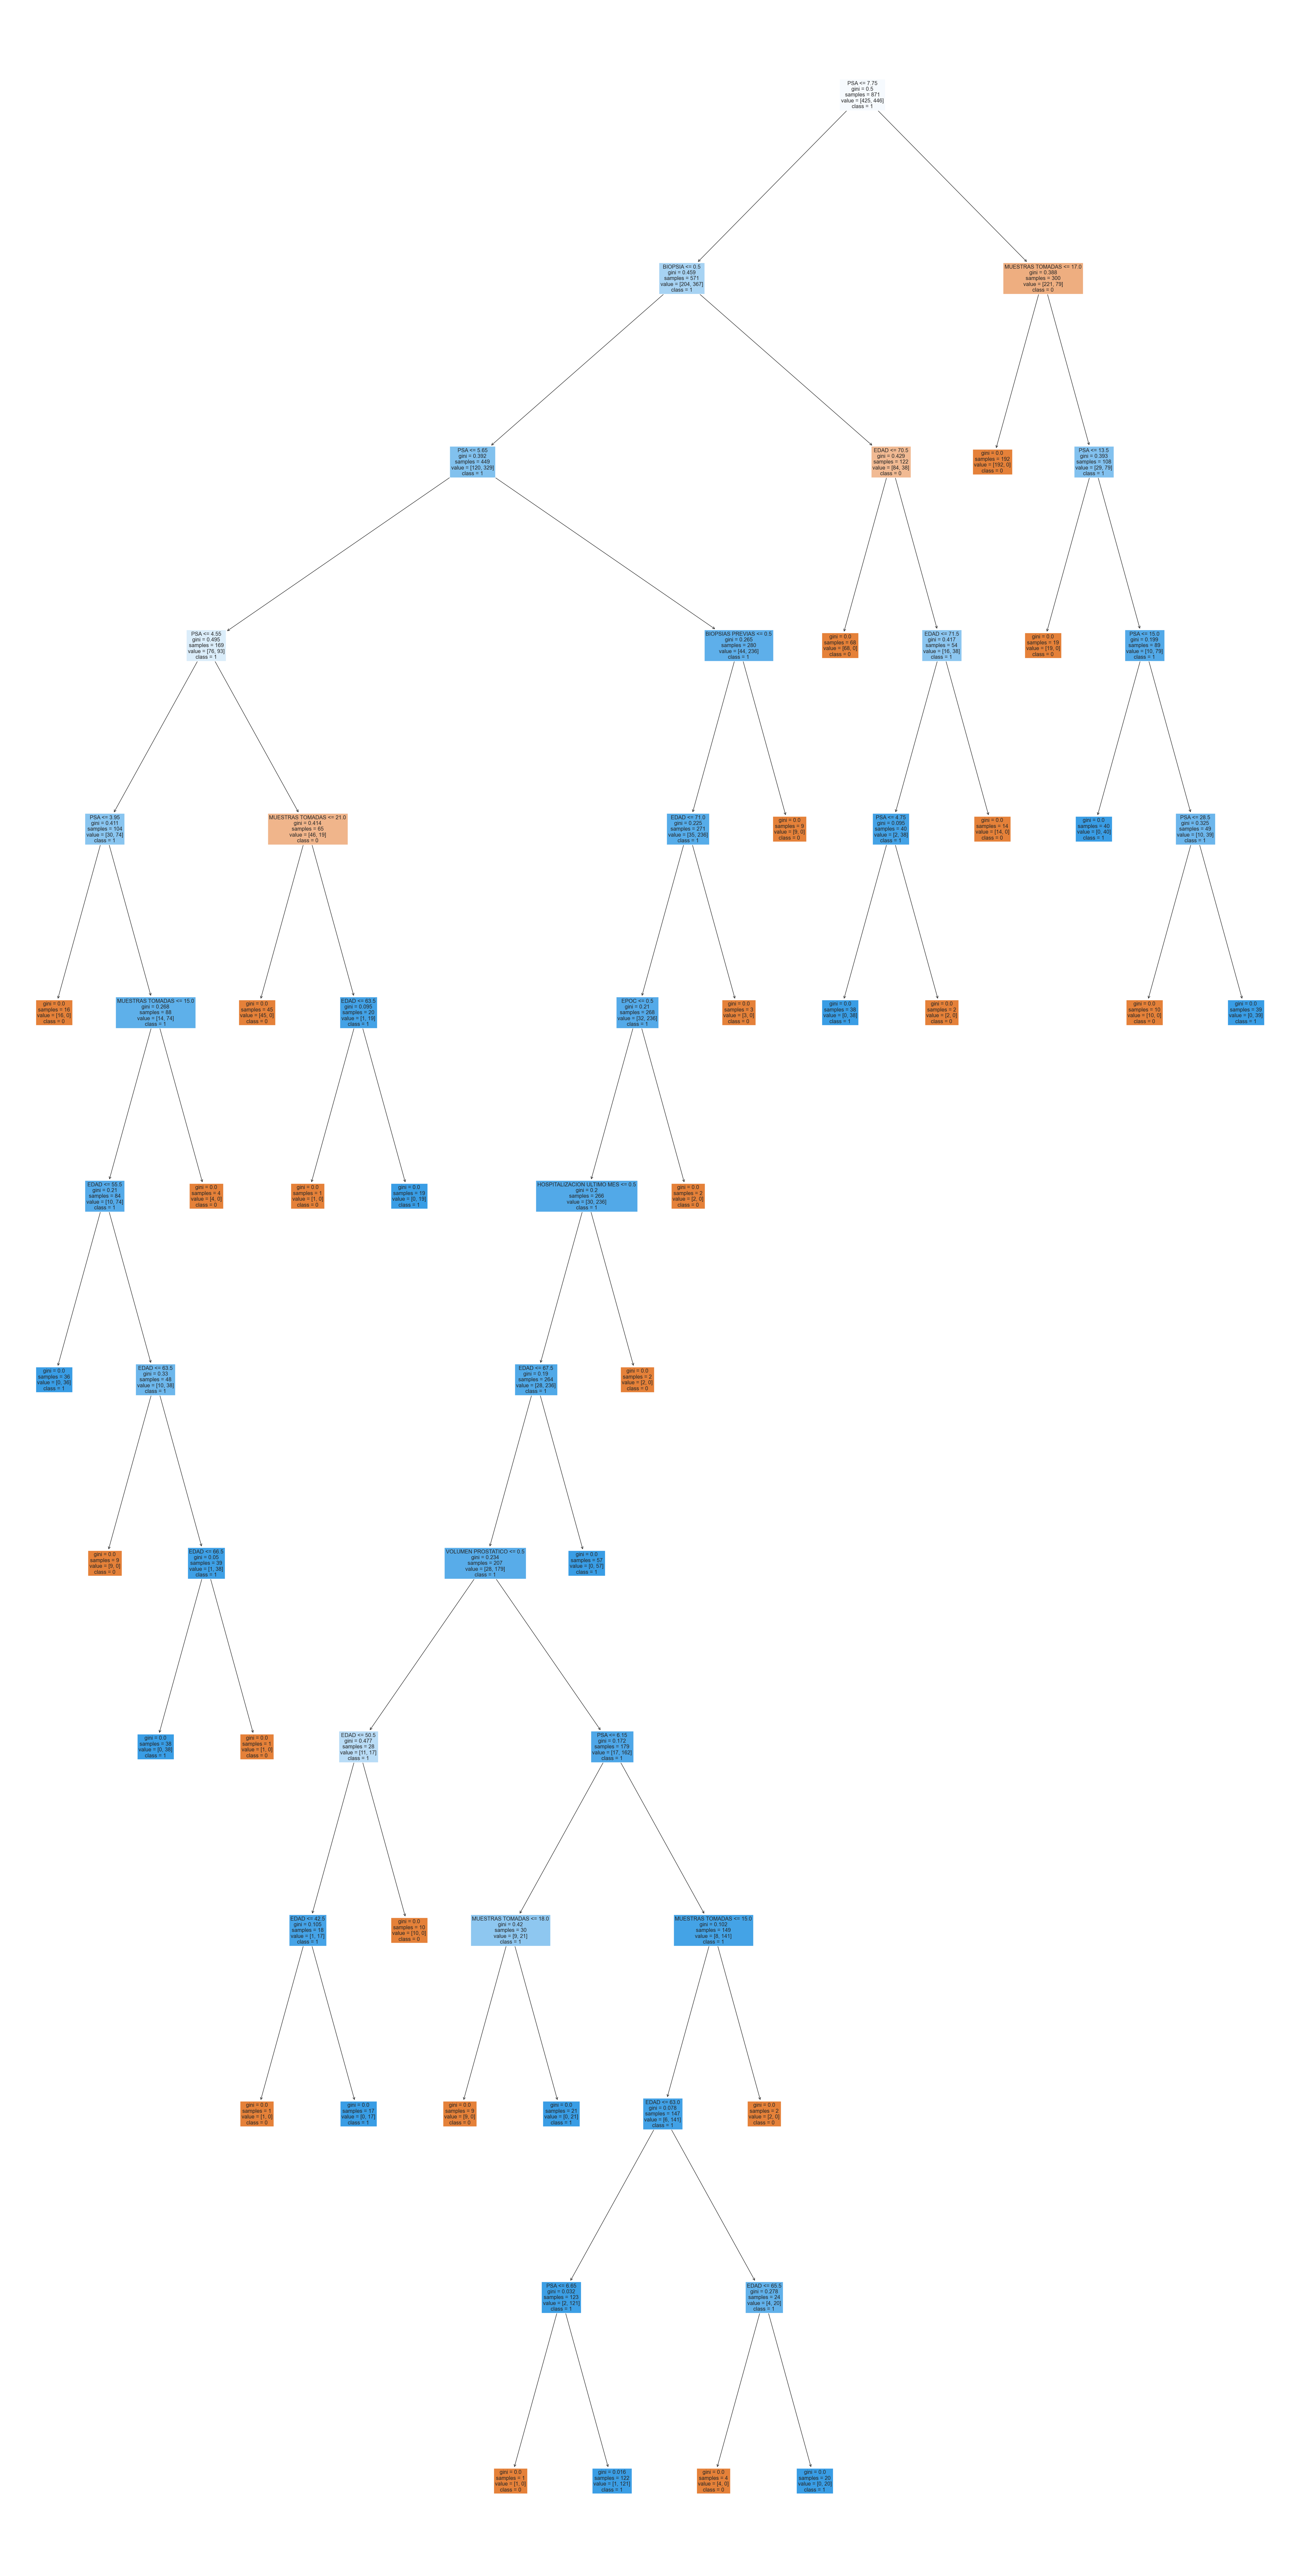

In [244]:
# Graficar el árbol de decisiones
plt.figure(figsize=(50, 100))
plot_tree(modelo_arbol, feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()

# K-Vecinos

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/